In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

In [2]:
abbes_df = pd.read_csv("Forest Fire data/Algerian_forest_fires_dataset_UPDATE.csv", skiprows=126)
abbes_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [3]:
abbes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.5+ KB


In [4]:
abbes_df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [5]:
abbes_df = abbes_df.rename(columns = {i: i.strip() for i in abbes_df.columns})
abbes_df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [6]:
print(abbes_df["Classes"].unique())
abbes_df["Classes"] = abbes_df["Classes"].str.strip()
print(abbes_df["Classes"].unique())

['not fire   ' 'fire   ' 'not fire     ' 'not fire    ']
['not fire' 'fire']


In [7]:
abbes_df.drop(columns=["day", "year"], inplace=True)
abbes_df.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,6,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,6,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,6,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,6,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,6,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'Ws'}>],
       [<AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>],
       [<AxesSubplot:title={'center':'FWI'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

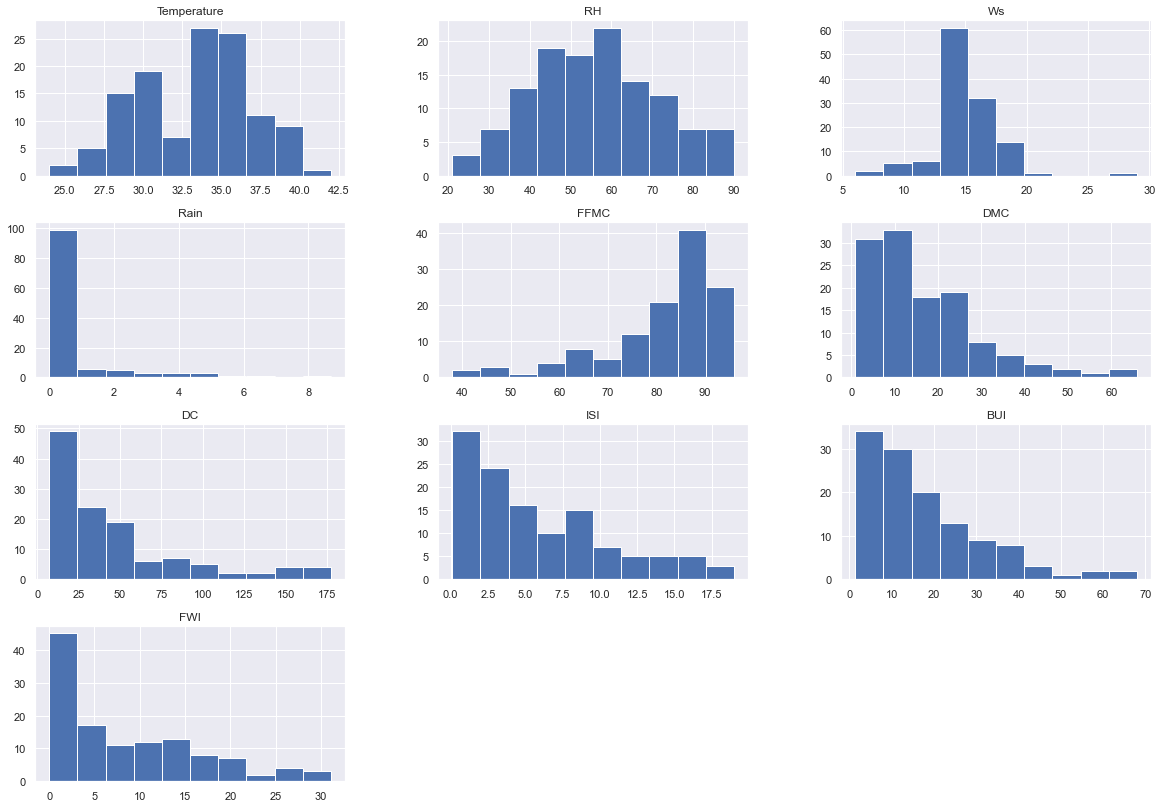

In [8]:
abbes_df.drop(columns=["month"]).hist(figsize=(20,14),color='b')

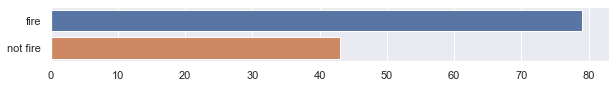

In [9]:
plt.figure(figsize=(10,1))
sns.barplot(y = abbes_df["Classes"].value_counts().index, x = abbes_df["Classes"].value_counts().values, orient='h')
plt.show()

In [10]:
abbes_df["Classes"].value_counts()

fire        79
not fire    43
Name: Classes, dtype: int64

In [11]:
abbes_df.groupby("month")["Classes"].value_counts()

month  Classes 
6      not fire    18
       fire        12
7      fire        24
       not fire     7
8      fire        27
       not fire     4
9      fire        16
       not fire    14
Name: Classes, dtype: int64

In [12]:
abbes_df.drop(columns=["month"], inplace=True)

In [13]:
abbes_df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,33.163934,55.901639,15.008197,0.678689,81.102459,17.031967,45.415574,5.863934,17.920492,8.520492
std,3.675608,15.716186,2.692186,1.486759,12.244064,12.995068,42.927562,4.803667,13.870785,8.137424
min,24.000000,21.000000,6.000000,0.000000,37.900000,0.900000,7.300000,0.100000,1.400000,0.000000
25%,30.000000,43.250000,14.000000,0.000000,77.650000,7.325000,14.700000,1.825000,7.400000,0.925000
50%,34.000000,56.000000,15.000000,0.000000,84.850000,13.150000,31.500000,4.600000,13.900000,6.050000
75%,36.000000,66.750000,16.750000,0.475000,89.275000,22.900000,56.975000,8.625000,23.875000,13.650000
max,42.000000,90.000000,29.000000,8.700000,96.000000,65.900000,177.300000,19.000000,68.000000,31.100000


<AxesSubplot:>

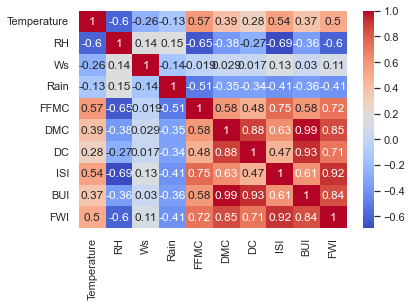

In [14]:
sns.heatmap(abbes_df.corr(), cmap="coolwarm", annot=True)

In [15]:
abbes_df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.598309,-0.258208,-0.129718,0.573122,0.389748,0.284506,0.538246,0.367756,0.500590
RH,-0.598309,1.000000,0.141436,0.149027,-0.645540,-0.379057,-0.265698,-0.692335,-0.360802,-0.604374
Ws,-0.258208,0.141436,1.000000,-0.139740,-0.019406,0.028765,0.017140,0.133713,0.029740,0.107695
Rain,-0.129718,0.149027,-0.139740,1.000000,-0.510498,-0.348431,-0.344823,-0.413477,-0.358060,-0.410564
FFMC,0.573122,-0.645540,-0.019406,-0.510498,1.000000,0.581300,0.480658,0.753370,0.577025,0.719442
DMC,0.389748,-0.379057,0.028765,-0.348431,0.581300,1.000000,0.882122,0.627900,0.987917,0.851033
DC,0.284506,-0.265698,0.017140,-0.344823,0.480658,0.882122,1.000000,0.468275,0.927528,0.713884
ISI,0.538246,-0.692335,0.133713,-0.413477,0.753370,0.627900,0.468275,1.000000,0.608683,0.915852
BUI,0.367756,-0.360802,0.029740,-0.358060,0.577025,0.987917,0.927528,0.608683,1.000000,0.843238
FWI,0.500590,-0.604374,0.107695,-0.410564,0.719442,0.851033,0.713884,0.915852,0.843238,1.000000


<AxesSubplot:>

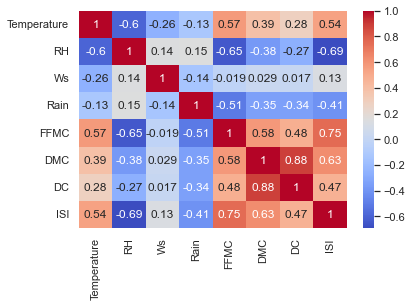

In [16]:
abbes_df.drop(columns=["BUI", "FWI"], inplace=True)
sns.heatmap(abbes_df.corr(), cmap="coolwarm", annot=True)

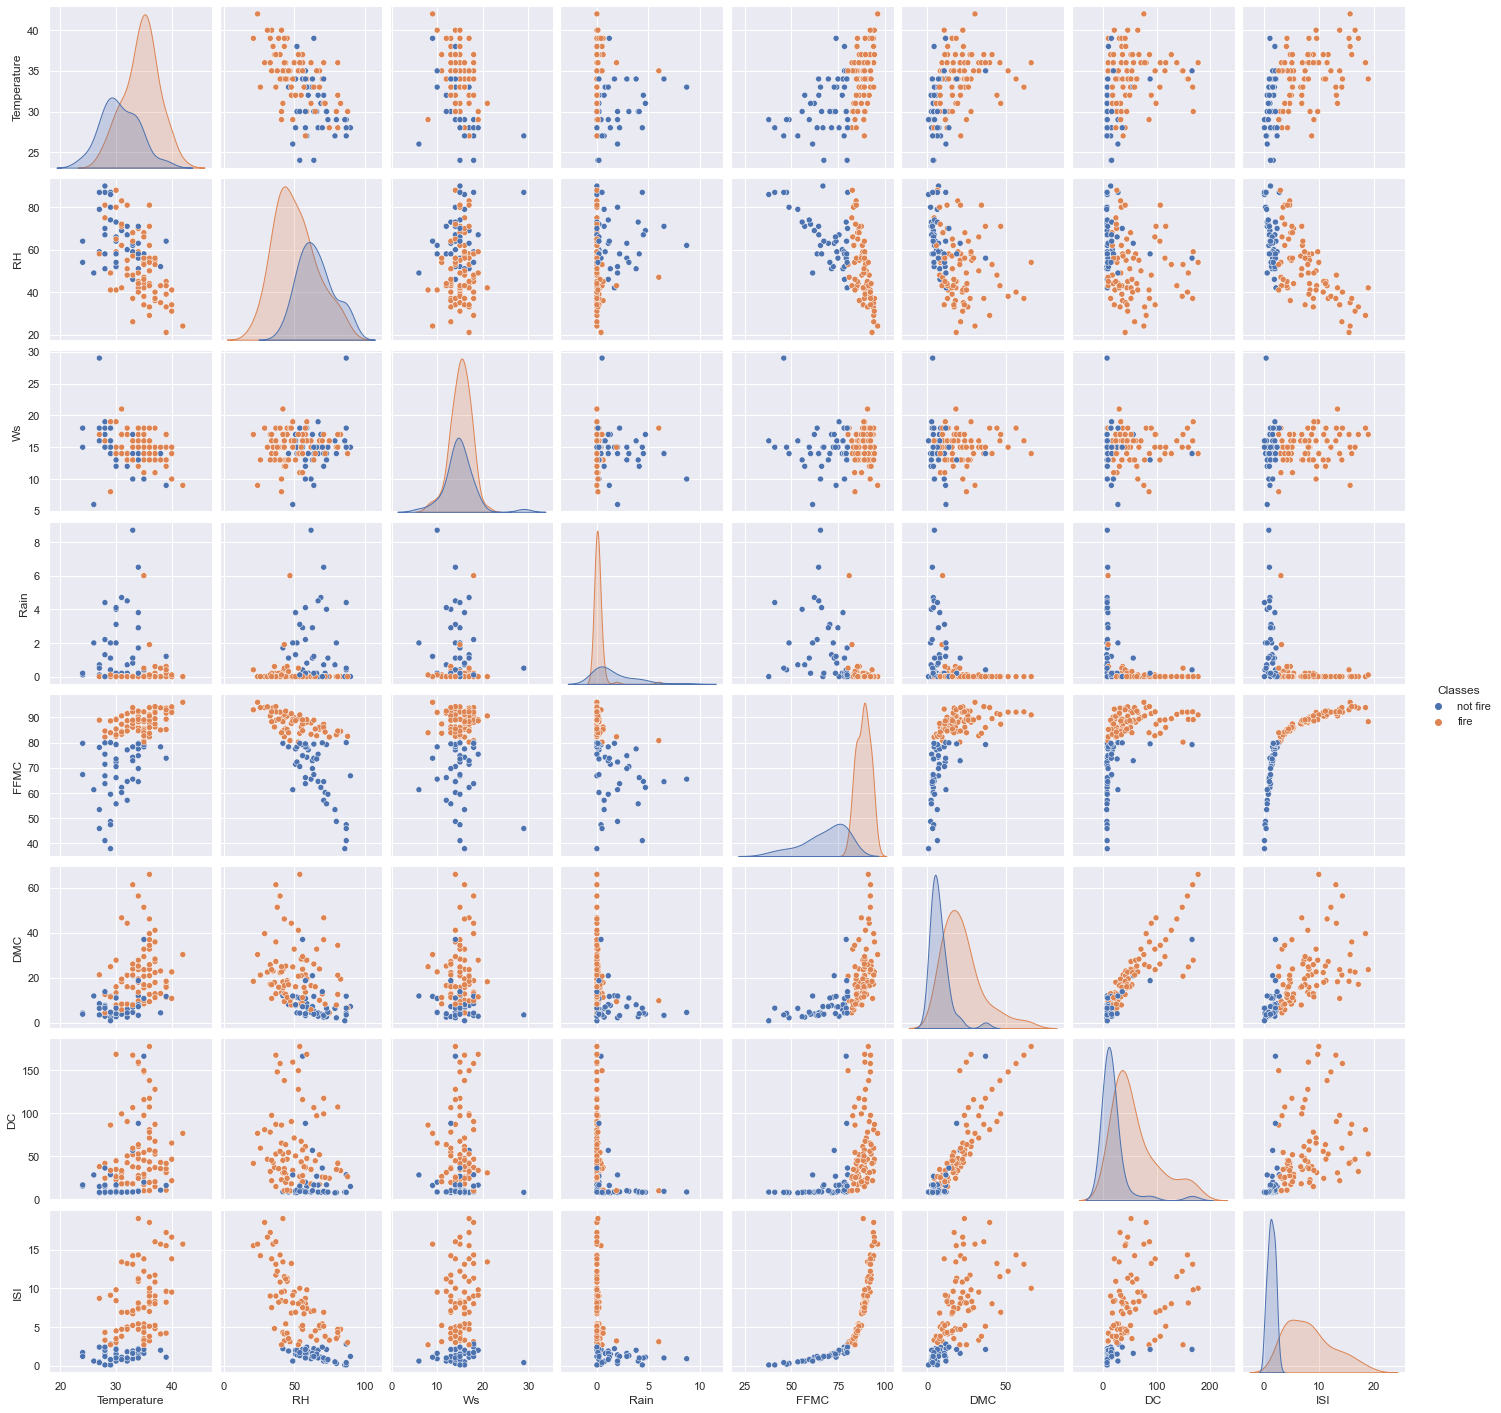

In [17]:
sns.pairplot(abbes_df, hue="Classes")

In [18]:
abbes_df["fire"] = pd.get_dummies(abbes_df["Classes"])["fire"]
abbes_df.drop(columns=["Classes"], inplace=True)
abbes_df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,fire
0,32,71,12,0.7,57.1,2.5,8.2,0.6,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,0


Text(0.5, 1.0, 'index from the FWI system: 1.1 to 65.9')

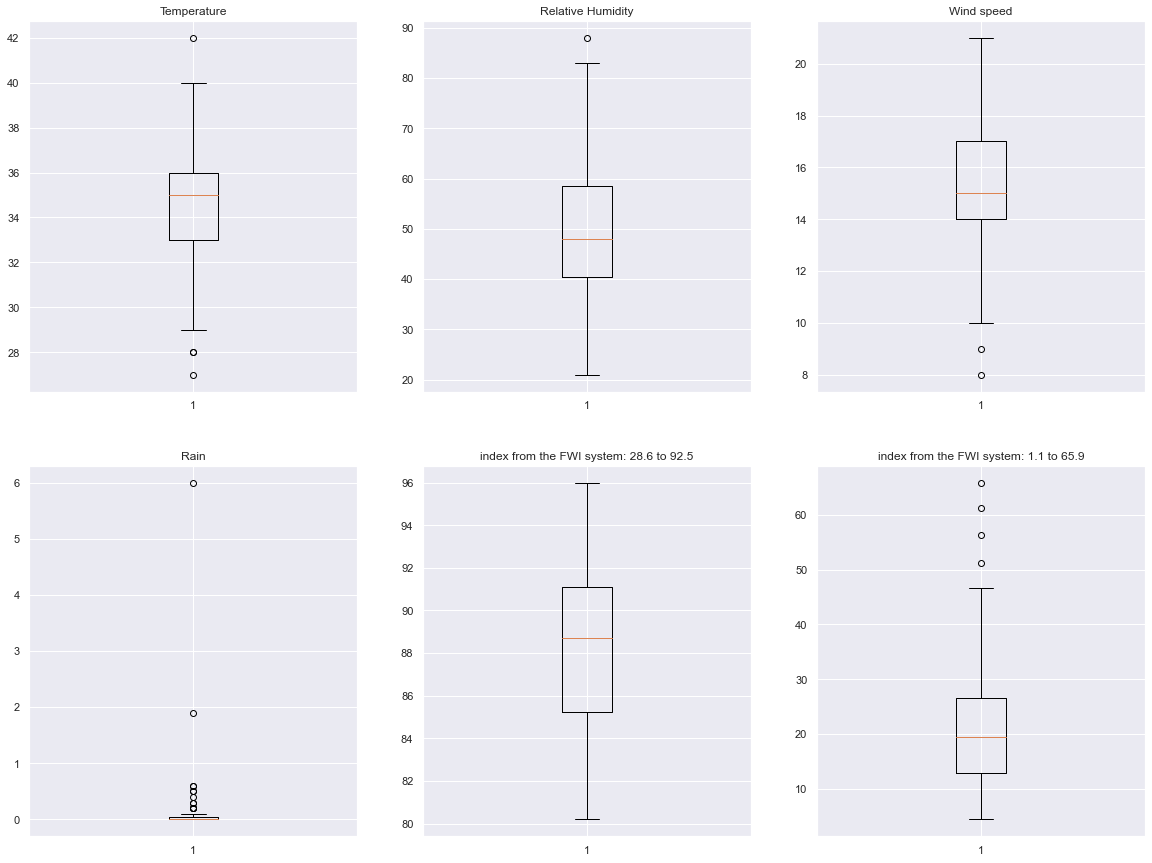

In [19]:
plt.figure(figsize = (20, 15))

ax = plt.subplot(231)
plt.boxplot(abbes_df[abbes_df["fire"] == 1].Temperature)
ax.set_title('Temperature')

ax = plt.subplot(232)
plt.boxplot(abbes_df[abbes_df["fire"] == 1].RH)
ax.set_title('Relative Humidity')

ax = plt.subplot(233)
plt.boxplot(abbes_df[abbes_df["fire"] == 1].Ws)
ax.set_title('Wind speed')

ax = plt.subplot(234)
plt.boxplot(abbes_df[abbes_df["fire"] == 1].Rain)
ax.set_title('Rain')

ax = plt.subplot(235)
plt.boxplot(abbes_df[abbes_df["fire"] == 1].FFMC)
ax.set_title('index from the FWI system: 28.6 to 92.5')

ax = plt.subplot(236)
plt.boxplot(abbes_df[abbes_df["fire"] == 1].DMC)
ax.set_title('index from the FWI system: 1.1 to 65.9')

Text(0.5, 1.0, 'index from the FWI system: 1.1 to 65.9')

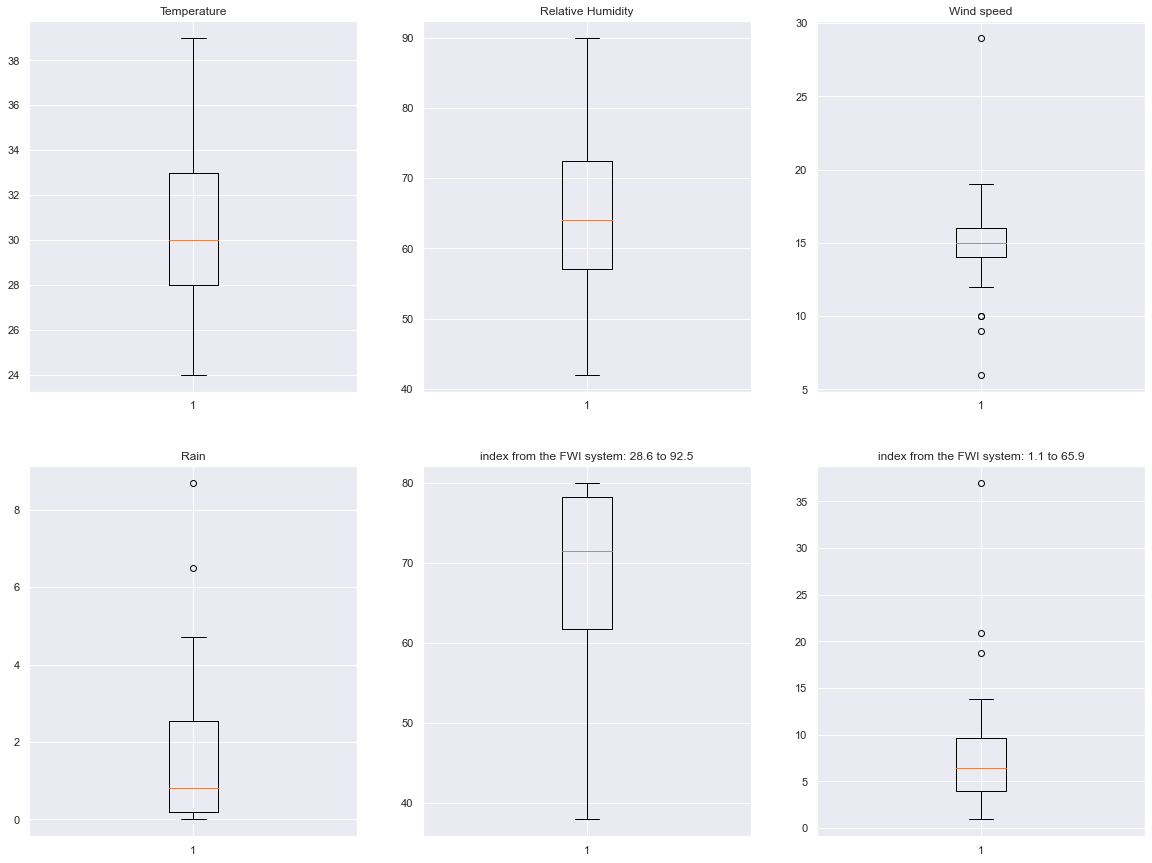

In [20]:
plt.figure(figsize = (20, 15))

ax = plt.subplot(231)
plt.boxplot(abbes_df[abbes_df["fire"] == 0].Temperature)
ax.set_title('Temperature')

ax = plt.subplot(232)
plt.boxplot(abbes_df[abbes_df["fire"] == 0].RH)
ax.set_title('Relative Humidity')

ax = plt.subplot(233)
plt.boxplot(abbes_df[abbes_df["fire"] == 0].Ws)
ax.set_title('Wind speed')

ax = plt.subplot(234)
plt.boxplot(abbes_df[abbes_df["fire"] == 0].Rain)
ax.set_title('Rain')

ax = plt.subplot(235)
plt.boxplot(abbes_df[abbes_df["fire"] == 0].FFMC)
ax.set_title('index from the FWI system: 28.6 to 92.5')

ax = plt.subplot(236)
plt.boxplot(abbes_df[abbes_df["fire"] == 0].DMC)
ax.set_title('index from the FWI system: 1.1 to 65.9')

In [21]:
from scipy import stats
from math import sqrt
def get_simultaneous_confidence_interval(df, column_name, confidence):
    alpha = 1 - confidence
    std, mean = df[column_name].std(), df[column_name].mean()
    p, n = len(df.columns) - 1, len(df)
    f = sqrt(((n-1)*p)/(n-p)*stats.f.ppf(alpha, p, n-p))
    l,r = mean - (std / sqrt(n)) * f, mean + (std / sqrt(n)) * f
    return [l,r]

fire_df, not_fire_df = abbes_df[abbes_df["fire"] == 1], abbes_df[abbes_df["fire"] == 0]

print("Simultaneous confidence intervals for attributes when there is fire:")
for col in fire_df.drop(columns=["fire"]).columns:
    print(f"{col} - {get_simultaneous_confidence_interval(fire_df, col, 0.90)}")

print("\nSimultaneous confidence intervals for attributes when there is no fire:")
for col in not_fire_df.drop(columns=["fire"]).columns:
    print(f"{col} - {get_simultaneous_confidence_interval(not_fire_df, col, 0.90)}")

Simultaneous confidence intervals for attributes when there is fire:
Temperature - [33.83823918328021, 35.1997355002641]
RH - [47.491485490900224, 54.052818306568135]
Ws - [14.616864137837386, 15.610983963428438]
Rain - [0.0042811514791100125, 0.31470619029304187]
FFMC - [87.46697335222673, 89.0646722173935]
DMC - [19.312647509954537, 24.943048692577115]
DC - [50.463163421478754, 69.28367202155924]
ISI - [7.395278221918792, 9.255354689473615]

Simultaneous confidence intervals for attributes when there is no fire:
Temperature - [29.65284455946729, 31.695992649835034]
RH - [61.539965453475354, 69.11119733722231]
Ws - [13.786830827699621, 15.841076149044564]
Rain - [1.0194393404058515, 2.245676938663916]
FFMC - [64.39992649007799, 71.48379444015457]
DMC - [5.74369809192644, 9.595836791794493]
DC - [10.471559144801752, 27.23541759938429]
ISI - [1.1307080181103037, 1.553012912122255]


In [22]:
abbes_df[abbes_df["fire"] == 1].drop(columns=["fire"]).describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,34.518987,50.772152,15.113924,0.159494,88.265823,22.127848,59.873418,8.325316
std,3.116790,15.020456,2.275777,0.710637,3.657514,12.889331,43.084633,4.258159
min,27.000000,21.000000,8.000000,0.000000,80.200000,4.400000,9.700000,2.700000
25%,33.000000,40.500000,14.000000,0.000000,85.250000,12.850000,29.700000,4.700000
50%,35.000000,48.000000,15.000000,0.000000,88.700000,19.400000,45.100000,8.000000
75%,36.000000,58.500000,17.000000,0.050000,91.100000,26.650000,79.200000,11.050000
max,42.000000,88.000000,21.000000,6.000000,96.000000,65.900000,177.300000,19.000000


In [23]:
abbes_df[abbes_df["fire"] == 0].drop(columns=["fire"]).describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,30.674419,65.325581,14.813953,1.632558,67.941860,7.669767,18.853488,1.341860
std,3.328956,12.336012,3.347037,1.997942,11.541937,6.276393,27.313806,0.688073
min,24.000000,42.000000,6.000000,0.000000,37.900000,0.900000,7.300000,0.100000
25%,28.000000,57.000000,14.000000,0.200000,61.750000,3.950000,8.200000,0.850000
50%,30.000000,64.000000,15.000000,0.800000,71.400000,6.400000,9.100000,1.300000
75%,33.000000,72.500000,16.000000,2.550000,78.200000,9.650000,16.400000,1.950000
max,39.000000,90.000000,29.000000,8.700000,80.000000,37.000000,166.000000,2.800000


In [24]:
def hoteling_t2(df, confidence):
    alpha = 1 - confidence
    p, n = 3, 59
    df = df[df["fire"] == 1]
    S = df[["Temperature", "RH", "Rain"]].cov()
    S_inv = np.linalg.inv(S)
    temp_mean, RH_mean, Rain_mean = df[["Temperature", "RH", "Rain"]].mean()
    X_bar_curl = np.array([[temp_mean, RH_mean, Rain_mean]]).T
    nu_bar_curl = np.array([[33, 64, 0.015]]).T
    hoteling_t2_val = (n * (X_bar_curl - nu_bar_curl).T @ S_inv @ (X_bar_curl - nu_bar_curl))[0][0]
    print(f"Hoteling T2 value: {hoteling_t2_val}")
    chi_2 = stats.chi2.ppf(alpha, p)
    print(f"Critical Value chi squared: {chi_2}")
    if hoteling_t2_val > chi_2:
        print("Hypothesis is rejected")
    else:
        print("Hypothesis failed to reject")
hoteling_t2(abbes_df, 0.90)

Hoteling T2 value: 46.597470805859786
Critical Value chi squared: 0.5843743741551833
Hypothesis is rejected


In [25]:
# lda on abbes_df
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(abbes_df.drop(columns=["fire"]), abbes_df["fire"])
print(lda.explained_variance_ratio_)

lda_df = pd.DataFrame(lda.transform(abbes_df.drop(columns=["fire"])))

lda_df["fire"] = abbes_df["fire"]
print(lda_df.head())

[1.]
          0  fire
0 -3.007798     0
1 -3.391700     0
2 -3.927467     0
3 -0.620939     0
4 -0.947543     0


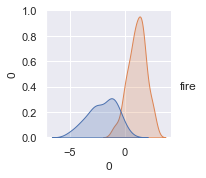

In [26]:
sns.pairplot(lda_df, hue="fire")

Confusion Matrix:
[[ 9  1]
 [ 0 15]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.94      1.00      0.97        15

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25

ROC_AUC Score: 0.9500000000000001


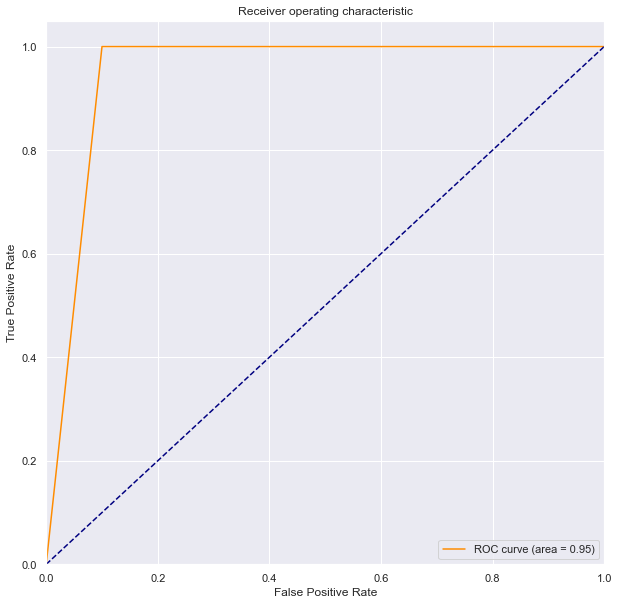

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(lda_df.drop(columns=["fire"]), lda_df["fire"], test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred)}")

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

Confusion Matrix:
[[10  0]
 [ 1 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.93      0.97        15

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25

ROC_AUC Score: 0.9666666666666667


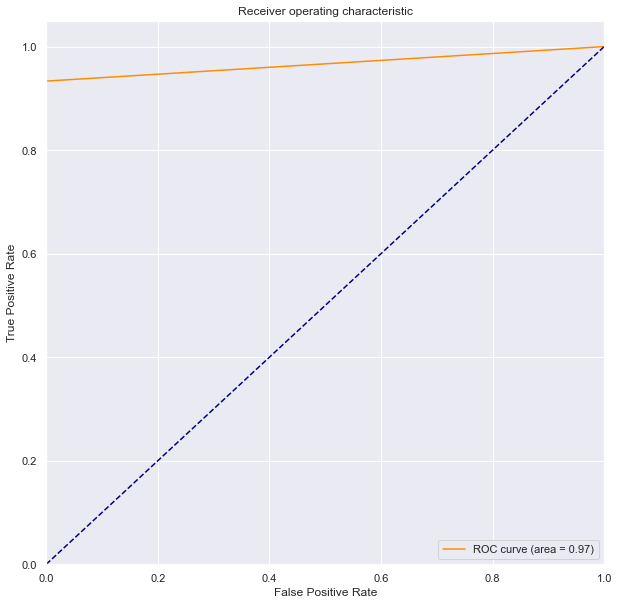

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(abbes_df.drop(columns=["fire"]), abbes_df["fire"], test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred)}")

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [29]:
y_trainpred = logreg.predict(X_train)

print("\nClassification Report:")
print(classification_report(y_train, y_trainpred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        64

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97

